In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as scp
import numpy.linalg as nplin

In [4]:
# Cálculo de los autovalores por el método de Numerov

# Arreglo de puntos sobre el eje x en donde se calcula la solución. Discretización del espacio.
xarray = np.linspace(-10,10,70)
N = len(xarray)

# Potencial
V_0 = (xarray)**2

# Método Numerov
x = np.eye(N,N,1)
y = np.eye(N,N,-1)
z = -2*np.eye(N,N)
w = V_0*np.eye(N,N)
w = x+y+z+w

# Se considera la condición de frontera en la función de onda en el infinito
w[:,0] = 0
w[:,N-1] = 0

# Matríz a resolver autovalores
np.set_printoptions(precision = 5)
print("\nMatríz a resolver autovalores:\n\n",w)

# Arreglo de autovalores
eigval = np.sort(nplin.eig(w)[0]) 
print('\n\n Autovalores de menor a mayor:\n\n ',eigval)


# Considerando solamente los 4 positivos más pequeños
eigval4 = []

for i in range(0,len(eigval)):
    if eigval[2*i]>0:
        eigval4.append(eigval[2*i])
        
    if len(eigval4) == 4:
        eigval4 = np.array(eigval4)
        break

print("\n\nLos cuatro primeros autovalores son:\n\n", eigval4)


Matríz a resolver autovalores:

 [[ 0.       1.       0.      ...  0.       0.       0.     ]
 [ 0.      92.28691  1.      ...  0.       0.       0.     ]
 [ 0.       1.      86.74186 ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ... 86.74186  1.       0.     ]
 [ 0.       0.       0.      ...  1.      92.28691  0.     ]
 [ 0.       0.       0.      ...  0.       1.       0.     ]]


 Autovalores de menor a mayor:

  [-3.71550e+00 -3.15764e+00 -2.62284e+00 -2.11290e+00 -1.63011e+00
 -1.17792e+00 -7.58893e-01 -4.01258e-01 -1.44834e-02  0.00000e+00
  0.00000e+00  1.02974e-01  7.49861e-01  7.54729e-01  1.69535e+00
  1.69540e+00  2.83378e+00  2.83378e+00  4.15355e+00  4.15355e+00
  5.64894e+00  5.64894e+00  7.31706e+00  7.31706e+00  9.15631e+00
  9.15631e+00  1.11657e+01  1.11657e+01  1.33447e+01  1.33447e+01
  1.56927e+01  1.56927e+01  1.82097e+01  1.82097e+01  2.08952e+01
  2.08952e+01  2.37493e+01  2.37493e+01  2.67719e+01  2.67719e+01
  2.99627e+01  2.99627e+01  3.

In [9]:
def Schrodinger(x,y):                                    
    return np.vstack([y[1], (eigval4[0]-x**2)*y[0]])


def bc(ya, yb):
    return np.array([ya[0], yb[0]])

In [10]:
x = np.linspace(-10,10,100)

y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
y_a[0] = 0.001
y_b[0] = 0
print(y_a)


[[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
  0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
  0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
  0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
  0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
  0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
  0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
  0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
  0.001 0.001 0.001 0.001]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    

In [11]:
from scipy.integrate import solve_bvp
res_a = solve_bvp(Schrodinger, bc, x, y_a)
res_b = solve_bvp(Schrodinger, bc, x, y_b)

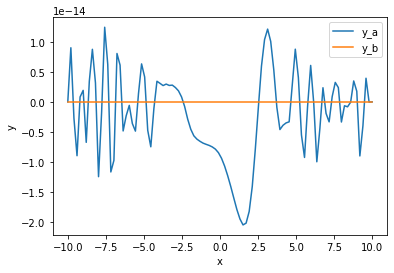

In [12]:
x_plot = np.linspace(-10, 10, 100)
y_plot_a = res_a.sol(x_plot)[0]
y_plot_b = res_b.sol(x_plot)[0]
import matplotlib.pyplot as plt
plt.plot(x_plot, y_plot_a, label='y_a')
plt.plot(x_plot, y_plot_b, label='y_b')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [73]:
psi0 = [0.001,0]
#x ya definido

In [58]:
from scipy.integrate import odeint
sol = odeint(Schrodinger, psi0, x)

ValueError: The values in t must be monotonically increasing or monotonically decreasing; repeated values are allowed.

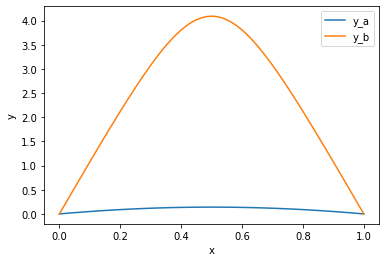

In [67]:
#y'' + 1* exp(y) = 0
#y(0) = y(1) = 0


#y1' = y2
#y2' = -exp(y1)

def fun(x, y):
    return np.vstack((y[1], -np.exp(y[0])))

def bc(ya, yb):
    return np.array([ya[0], yb[0]])


x = np.linspace(0, 1, 5)
y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
y_b[0] = 3


from scipy.integrate import solve_bvp
res_a = solve_bvp(fun, bc, x, y_a)
res_b = solve_bvp(fun, bc, x, y_b)

x_plot = np.linspace(0, 1, 100)
y_plot_a = res_a.sol(x_plot)[0]
y_plot_b = res_b.sol(x_plot)[0]
import matplotlib.pyplot as plt
plt.plot(x_plot, y_plot_a, label='y_a')
plt.plot(x_plot, y_plot_b, label='y_b')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
